## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

Let's load the Gas production:

In [2]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

Month   U.S.  Alaska  Arkansas  Kansas  Other States  \
0  2008-06-01  70626    8875      1196    1024          2995   
1  2008-07-01  71137    8375      1256    1034          3150   
2  2008-08-01  70760    8739      1313    1033          3092   

   Federal Offshore--Gulf of Mexico  Wyoming  West Virginia  Utah  \
0                              7339     6839            670  1198   
1                              7468     6940            674  1200   
2                              6868     6835            678  1277   

   Pennsylvania  Texas  Oklahoma  Ohio  North Dakota  New Mexico  Montana  \
0           540  21446      5241   224           243        3975      323   
1           512  21547      5256   220           243        4179      324   
2           529  21777      4896   220           249        4092      327   

   Louisiana  Colorado  California  
0       3989      3576         932  
1       4008      3834         919  
2       3896      4056         881

In [3]:
gas_df.shape
gas_df.columns
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [4]:
pd.to_datetime(gas_df[0])

KeyError: 0

In [5]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')
gas_df.head(3)
gas_df.dtypes[0:2] # To check if this worked!

Month    datetime64[ns]
U.S.              int64
dtype: object

In [6]:
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

---

## Yearly Gas production

In [7]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

U.S.  Alaska  Arkansas  Kansas  Other States  \
Month                                                    
2008    489473   64732      9395    7229         21678   
2009    856876  108986     22353   11689         36078   
2010    881622  105219     30475   10708         37542   
2011    936163  104154     35384   10191         38187   
2012    968632  103856     37571    9714         37045   
2013    970617  105776     37466    9613         22657   
2014   1032439  104298     36917    9415         20761   
2015   1082158  104447     33221    9349         20102   
2016   1070085  105900     26999    7984         18722   
2017   1090730  106969     23050    7247         17069   
2018    587058   54887      9991    3372          8129   

       Federal Offshore--Gulf of Mexico  Wyoming  West Virginia   Utah  \
Month                                                                    
2008                              39112    48393           4709   8726   
2009                              80346    83413           8692  14782   
2010                              74309    82687           8718  14361   
2011                              60213    78095          12948  15170   
2012                              50102    72988          17694  16079   
2013                              43647    67338          24363  15482   
2014                              41937    65709          35055  14946   
2015                              42979    65615          43236  13717   
2016                              39990    60613          45077  11958   
2017                              35592    56410          52609  10312   
2018                              15408    28696          28173   4970   

       Pennsylvania   Texas  Oklahoma   Ohio  North Dakota  New Mexico  \
Month                                                                    
2008           3759  151483     36206   1617          1773       28518   
2009           9009  251694     62535   2919          3040       46867   
2010          18771  249632     60074   2568          3741       44101   
2011          43014  260747     62075   2592          5155       42315   
2012          73950  266989     66337   2772          8473       41846   
2013         107076  272844     65524   5442         11362       41010   
2014         139932  284598     76643  16803         15214       41631   
2015         158236  289330     82166  33069         19211       42638   
2016         174225  266713     80932  47199         19964       42120   
2017         179644  260314     82616  58702         22577       43910   
2018          97811  137852     46373  36691         13160       23655   

       Montana  Louisiana  Colorado  California  
Month                                            
2008      2262      26289     27351        6240  
2009      3463      51221     49716       10071  
2010      3068      72873     52259       10521  
2011      2615      99905     54215        9181  
2012      2197      96895     56037        8092  
2013      2078      77873     52769        8296  
2014      1947      64746     54021        7861  
2015      1916      59621     55521        7786  
2016      1710      57459     55791        6723  
2017      1577      69947     55546        6642  
2018       739      44466     29410        3276

In [14]:
yearly_us_gas_df = yearly_gas_df.filter(items=["Month", "U.S."])
yearly_us_gas_df

U.S.
Month         
2008    489473
2009    856876
2010    881622
2011    936163
2012    968632
2013    970617
2014   1032439
2015   1082158
2016   1070085
2017   1090730
2018    587058

Text(0.5, 0, 'Year')

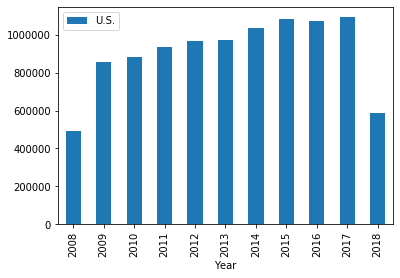

In [15]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

In [16]:
np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [17]:
yearly_gas_df[np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)]

U.S.  Alaska  Arkansas  Kansas  Other States  \
Month                                                    
2009    856876  108986     22353   11689         36078   
2010    881622  105219     30475   10708         37542   
2011    936163  104154     35384   10191         38187   
2012    968632  103856     37571    9714         37045   
2013    970617  105776     37466    9613         22657   
2014   1032439  104298     36917    9415         20761   
2015   1082158  104447     33221    9349         20102   
2016   1070085  105900     26999    7984         18722   
2017   1090730  106969     23050    7247         17069   

       Federal Offshore--Gulf of Mexico  Wyoming  West Virginia   Utah  \
Month                                                                    
2009                              80346    83413           8692  14782   
2010                              74309    82687           8718  14361   
2011                              60213    78095          12948  15170   
2012                              50102    72988          17694  16079   
2013                              43647    67338          24363  15482   
2014                              41937    65709          35055  14946   
2015                              42979    65615          43236  13717   
2016                              39990    60613          45077  11958   
2017                              35592    56410          52609  10312   

       Pennsylvania   Texas  Oklahoma   Ohio  North Dakota  New Mexico  \
Month                                                                    
2009           9009  251694     62535   2919          3040       46867   
2010          18771  249632     60074   2568          3741       44101   
2011          43014  260747     62075   2592          5155       42315   
2012          73950  266989     66337   2772          8473       41846   
2013         107076  272844     65524   5442         11362       41010   
2014         139932  284598     76643  16803         15214       41631   
2015         158236  289330     82166  33069         19211       42638   
2016         174225  266713     80932  47199         19964       42120   
2017         179644  260314     82616  58702         22577       43910   

       Montana  Louisiana  Colorado  California  
Month                                            
2009      3463      51221     49716       10071  
2010      3068      72873     52259       10521  
2011      2615      99905     54215        9181  
2012      2197      96895     56037        8092  
2013      2078      77873     52769        8296  
2014      1947      64746     54021        7861  
2015      1916      59621     55521        7786  
2016      1710      57459     55791        6723  
2017      1577      69947     55546        6642

In [18]:
yearly_gas_df = yearly_gas_df[np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)]

In [19]:
yearly_gas_df

U.S.  Alaska  Arkansas  Kansas  Other States  \
Month                                                    
2009    856876  108986     22353   11689         36078   
2010    881622  105219     30475   10708         37542   
2011    936163  104154     35384   10191         38187   
2012    968632  103856     37571    9714         37045   
2013    970617  105776     37466    9613         22657   
2014   1032439  104298     36917    9415         20761   
2015   1082158  104447     33221    9349         20102   
2016   1070085  105900     26999    7984         18722   
2017   1090730  106969     23050    7247         17069   

       Federal Offshore--Gulf of Mexico  Wyoming  West Virginia   Utah  \
Month                                                                    
2009                              80346    83413           8692  14782   
2010                              74309    82687           8718  14361   
2011                              60213    78095          12948  15170   
2012                              50102    72988          17694  16079   
2013                              43647    67338          24363  15482   
2014                              41937    65709          35055  14946   
2015                              42979    65615          43236  13717   
2016                              39990    60613          45077  11958   
2017                              35592    56410          52609  10312   

       Pennsylvania   Texas  Oklahoma   Ohio  North Dakota  New Mexico  \
Month                                                                    
2009           9009  251694     62535   2919          3040       46867   
2010          18771  249632     60074   2568          3741       44101   
2011          43014  260747     62075   2592          5155       42315   
2012          73950  266989     66337   2772          8473       41846   
2013         107076  272844     65524   5442         11362       41010   
2014         139932  284598     76643  16803         15214       41631   
2015         158236  289330     82166  33069         19211       42638   
2016         174225  266713     80932  47199         19964       42120   
2017         179644  260314     82616  58702         22577       43910   

       Montana  Louisiana  Colorado  California  
Month                                            
2009      3463      51221     49716       10071  
2010      3068      72873     52259       10521  
2011      2615      99905     54215        9181  
2012      2197      96895     56037        8092  
2013      2078      77873     52769        8296  
2014      1947      64746     54021        7861  
2015      1916      59621     55521        7786  
2016      1710      57459     55791        6723  
2017      1577      69947     55546        6642

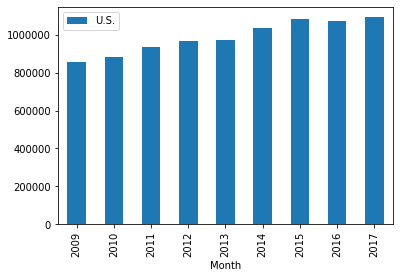

In [22]:
plot_1 = yearly_gas_df.filter(items=["U.S."]).plot(kind="bar")

In [23]:
### State production

Let's have a look at the yearly production of some specific states

SyntaxError: EOL while scanning string literal (<ipython-input-23-8ee2076701d5>, line 3)

### State production

Let's have a look at the yearly production of some specific states

In [25]:
yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

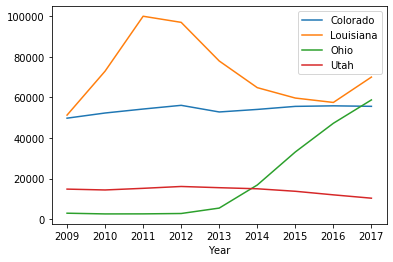

In [26]:
plot = yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year")

---

## Comparing with Crude Oil Production

In [27]:
file = "U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")
oil_df.head()

Month  U.S. Crude Oil   Alabama  Alaska  Arkansas  Arizona  \
0  2008-06-01             5138       21     655        17        0   
1  2008-07-01             5177       21     640        17        0   
2  2008-08-01             5003       21     544        17        0   
3  2008-09-01             3974       21     681        16        0   
4  2008-10-01             4738       21     716        17        0   

   California  Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
0         583        82                                       1326   
1         586        81                                       1372   
2         588        82                                       1272   
3         587        88                                        242   
4         586        86                                        803   

   Federal Offshore Pacific Crude Oil  ...  Ohio  Oklahoma  Pennsylvania  \
0                                  67  ...    14       186             8   
1                                  61  ...    14       184             8   
2                                  70  ...    14       188             8   
3                                  67  ...    14       186             8   
4                                  66  ...    14       185             8   

   South Dakota  Wyoming  West Virginia  Virginia  Utah  Texas  Tennessee  
0             5      144              6         0    60   1097          1  
1             5      145              5         0    61   1111          1  
2             5      145              6         0    62   1110          1  
3             5      144              6         0    63   1055          1  
4             5      145              6         0    64   1125          1  

[5 rows x 36 columns]

In [28]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')
oil_df.head(3)
oil_df.dtypes[0:2] # To check if this worked!

Month              datetime64[ns]
U.S. Crude Oil              int64
dtype: object

In [29]:
oil_df.groupby(oil_df["Month"].dt.year).sum()

U.S. Crude Oil   Alabama  Alaska  Arkansas  Arizona  California  \
Month                                                                    
2008             34211      149    4666       118        0        4095   
2009             64180      236    7749       189        0        6815   
2010             65741      234    7199       189        0        6588   
2011             67829      275    6742       195        0        6449   
2012             78007      312    6310       214        0        6465   
2013             89585      342    6182       218        0        6540   
2014            105064      323    5958       224        0        6729   
2015            113179      318    5796       205        0        6619   
2016            105970      266    5874       183        0        6101   
2017            112205      224    5936       173        0        5723   
2018             62296       99    2977        84        0        2779   

       Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
Month                                                        
2008        589                                       7302   
2009        998                                      18727   
2010       1086                                      18640   
2011       1295                                      15805   
2012       1626                                      15189   
2013       2175                                      15068   
2014       3139                                      16761   
2015       4036                                      18174   
2016       3820                                      19177   
2017       4293                                      20152   
2018       2609                                       9761   

       Federal Offshore Pacific Crude Oil  Florida  ...  Ohio  Oklahoma  \
Month                                               ...                   
2008                                  465       37  ...    98      1286   
2009                                  734       24  ...   156      2144   
2010                                  713       56  ...   156      2239   
2011                                  652       67  ...   156      2534   
2012                                  580       71  ...   168      3095   
2013                                  610       72  ...   264      3786   
2014                                  608       73  ...   495      4605   
2015                                  378       72  ...   876      5484   
2016                                  201       63  ...   705      5102   
2017                                  186       63  ...   623      5454   
2018                                   90       30  ...   335      3186   

       Pennsylvania  South Dakota  Wyoming  West Virginia  Virginia  Utah  \
Month                                                                       
2008             56            35     1013             39         0   438   
2009             96            55     1695             48         0   757   
2010            108            53     1771             59         0   809   
2011            114            53     1795             72         0   864   
2012            144            60     1900             85         0   991   
2013            174            60     2088            237         0  1152   
2014            222            60     2501            340         0  1346   
2015            232            53     2842            380         0  1222   
2016            207            47     2380            251         0  1001   
2017            217            46     2485            310         0  1125   
2018            109            23     1362            172         0   598   

       Texas  Tennessee  
Month                    
2008    7773          7  
2009   13132         12  
2010   14026         12  
2011   17393         12  
2012   23742         12  
2013   30475         12  
2014   38049         12  
2015   41335         12  

In [30]:
yearly_oil_df = oil_df.groupby(oil_df["Month"].dt.year).sum()

In [31]:
yearly_oil_df

U.S. Crude Oil   Alabama  Alaska  Arkansas  Arizona  California  \
Month                                                                    
2008             34211      149    4666       118        0        4095   
2009             64180      236    7749       189        0        6815   
2010             65741      234    7199       189        0        6588   
2011             67829      275    6742       195        0        6449   
2012             78007      312    6310       214        0        6465   
2013             89585      342    6182       218        0        6540   
2014            105064      323    5958       224        0        6729   
2015            113179      318    5796       205        0        6619   
2016            105970      266    5874       183        0        6101   
2017            112205      224    5936       173        0        5723   
2018             62296       99    2977        84        0        2779   

       Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
Month                                                        
2008        589                                       7302   
2009        998                                      18727   
2010       1086                                      18640   
2011       1295                                      15805   
2012       1626                                      15189   
2013       2175                                      15068   
2014       3139                                      16761   
2015       4036                                      18174   
2016       3820                                      19177   
2017       4293                                      20152   
2018       2609                                       9761   

       Federal Offshore Pacific Crude Oil  Florida  ...  Ohio  Oklahoma  \
Month                                               ...                   
2008                                  465       37  ...    98      1286   
2009                                  734       24  ...   156      2144   
2010                                  713       56  ...   156      2239   
2011                                  652       67  ...   156      2534   
2012                                  580       71  ...   168      3095   
2013                                  610       72  ...   264      3786   
2014                                  608       73  ...   495      4605   
2015                                  378       72  ...   876      5484   
2016                                  201       63  ...   705      5102   
2017                                  186       63  ...   623      5454   
2018                                   90       30  ...   335      3186   

       Pennsylvania  South Dakota  Wyoming  West Virginia  Virginia  Utah  \
Month                                                                       
2008             56            35     1013             39         0   438   
2009             96            55     1695             48         0   757   
2010            108            53     1771             59         0   809   
2011            114            53     1795             72         0   864   
2012            144            60     1900             85         0   991   
2013            174            60     2088            237         0  1152   
2014            222            60     2501            340         0  1346   
2015            232            53     2842            380         0  1222   
2016            207            47     2380            251         0  1001   
2017            217            46     2485            310         0  1125   
2018            109            23     1362            172         0   598   

       Texas  Tennessee  
Month                    
2008    7773          7  
2009   13132         12  
2010   14026         12  
2011   17393         12  
2012   23742         12  
2013   30475         12  
2014   38049         12  
2015   41335         12  

In [32]:
yearly_gas_df

U.S.  Alaska  Arkansas  Kansas  Other States  \
Month                                                    
2009    856876  108986     22353   11689         36078   
2010    881622  105219     30475   10708         37542   
2011    936163  104154     35384   10191         38187   
2012    968632  103856     37571    9714         37045   
2013    970617  105776     37466    9613         22657   
2014   1032439  104298     36917    9415         20761   
2015   1082158  104447     33221    9349         20102   
2016   1070085  105900     26999    7984         18722   
2017   1090730  106969     23050    7247         17069   

       Federal Offshore--Gulf of Mexico  Wyoming  West Virginia   Utah  \
Month                                                                    
2009                              80346    83413           8692  14782   
2010                              74309    82687           8718  14361   
2011                              60213    78095          12948  15170   
2012                              50102    72988          17694  16079   
2013                              43647    67338          24363  15482   
2014                              41937    65709          35055  14946   
2015                              42979    65615          43236  13717   
2016                              39990    60613          45077  11958   
2017                              35592    56410          52609  10312   

       Pennsylvania   Texas  Oklahoma   Ohio  North Dakota  New Mexico  \
Month                                                                    
2009           9009  251694     62535   2919          3040       46867   
2010          18771  249632     60074   2568          3741       44101   
2011          43014  260747     62075   2592          5155       42315   
2012          73950  266989     66337   2772          8473       41846   
2013         107076  272844     65524   5442         11362       41010   
2014         139932  284598     76643  16803         15214       41631   
2015         158236  289330     82166  33069         19211       42638   
2016         174225  266713     80932  47199         19964       42120   
2017         179644  260314     82616  58702         22577       43910   

       Montana  Louisiana  Colorado  California  
Month                                            
2009      3463      51221     49716       10071  
2010      3068      72873     52259       10521  
2011      2615      99905     54215        9181  
2012      2197      96895     56037        8092  
2013      2078      77873     52769        8296  
2014      1947      64746     54021        7861  
2015      1916      59621     55521        7786  
2016      1710      57459     55791        6723  
2017      1577      69947     55546        6642

In [35]:
yearly_oil_df = yearly_oil_df.filter(items=["Month", "U.S."])

In [36]:
yearly_oil_df

Empty DataFrame
Columns: []
Index: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [37]:
yearly_oil_df = oil_df.groupby(oil_df["Month"].dt.year).sum()

In [38]:
yearly_oil_df

U.S. Crude Oil   Alabama  Alaska  Arkansas  Arizona  California  \
Month                                                                    
2008             34211      149    4666       118        0        4095   
2009             64180      236    7749       189        0        6815   
2010             65741      234    7199       189        0        6588   
2011             67829      275    6742       195        0        6449   
2012             78007      312    6310       214        0        6465   
2013             89585      342    6182       218        0        6540   
2014            105064      323    5958       224        0        6729   
2015            113179      318    5796       205        0        6619   
2016            105970      266    5874       183        0        6101   
2017            112205      224    5936       173        0        5723   
2018             62296       99    2977        84        0        2779   

       Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
Month                                                        
2008        589                                       7302   
2009        998                                      18727   
2010       1086                                      18640   
2011       1295                                      15805   
2012       1626                                      15189   
2013       2175                                      15068   
2014       3139                                      16761   
2015       4036                                      18174   
2016       3820                                      19177   
2017       4293                                      20152   
2018       2609                                       9761   

       Federal Offshore Pacific Crude Oil  Florida  ...  Ohio  Oklahoma  \
Month                                               ...                   
2008                                  465       37  ...    98      1286   
2009                                  734       24  ...   156      2144   
2010                                  713       56  ...   156      2239   
2011                                  652       67  ...   156      2534   
2012                                  580       71  ...   168      3095   
2013                                  610       72  ...   264      3786   
2014                                  608       73  ...   495      4605   
2015                                  378       72  ...   876      5484   
2016                                  201       63  ...   705      5102   
2017                                  186       63  ...   623      5454   
2018                                   90       30  ...   335      3186   

       Pennsylvania  South Dakota  Wyoming  West Virginia  Virginia  Utah  \
Month                                                                       
2008             56            35     1013             39         0   438   
2009             96            55     1695             48         0   757   
2010            108            53     1771             59         0   809   
2011            114            53     1795             72         0   864   
2012            144            60     1900             85         0   991   
2013            174            60     2088            237         0  1152   
2014            222            60     2501            340         0  1346   
2015            232            53     2842            380         0  1222   
2016            207            47     2380            251         0  1001   
2017            217            46     2485            310         0  1125   
2018            109            23     1362            172         0   598   

       Texas  Tennessee  
Month                    
2008    7773          7  
2009   13132         12  
2010   14026         12  
2011   17393         12  
2012   23742         12  
2013   30475         12  
2014   38049         12  
2015   41335         12  

In [39]:
yearly_oil_df = yearly_oil_df.filter(items=["Month", "U.S. Crude Oil"])

In [40]:
yearly_oil_df

Empty DataFrame
Columns: []
Index: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [41]:
yearly_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])

In [42]:
yearly_oil

U.S. Crude Oil 
Month                 
2008             34211
2009             64180
2010             65741
2011             67829
2012             78007
2013             89585
2014            105064
2015            113179
2016            105970
2017            112205
2018             62296

In [45]:
yearly_oil.columns = ["Crude Oil"]

In [46]:
yearly_oil

Crude Oil
Month           
2008       34211
2009       64180
2010       65741
2011       67829
2012       78007
2013       89585
2014      105064
2015      113179
2016      105970
2017      112205
2018       62296

In [47]:
yearly_gas = gas_df.groupby(gas_df["Month"].dt.year).sum().filter(items=["U.S."])

In [48]:
yearly_gas

U.S.
Month         
2008    489473
2009    856876
2010    881622
2011    936163
2012    968632
2013    970617
2014   1032439
2015   1082158
2016   1070085
2017   1090730
2018    587058

In [49]:
yearly_gas.columns = ["Gas"]

In [50]:
yearly_gas

Gas
Month         
2008    489473
2009    856876
2010    881622
2011    936163
2012    968632
2013    970617
2014   1032439
2015   1082158
2016   1070085
2017   1090730
2018    587058

In [51]:
pd.concat(yearly_gas, yearly_oil)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [52]:
yearly_merged = pd.concat([yearly_oil, yearly_gas], axis='columns')
yearly_merged


Crude Oil      Gas
Month                    
2008       34211   489473
2009       64180   856876
2010       65741   881622
2011       67829   936163
2012       78007   968632
2013       89585   970617
2014      105064  1032439
2015      113179  1082158
2016      105970  1070085
2017      112205  1090730
2018       62296   587058

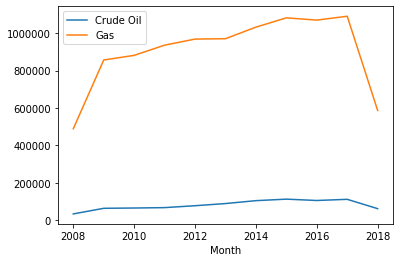

In [53]:
yearly_merged.plot()

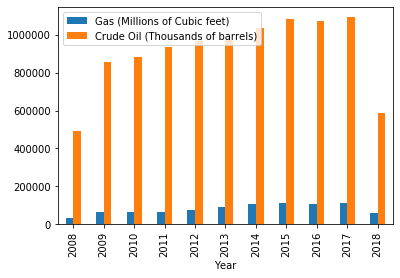

In [54]:
plot = yearly_merged.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])